Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.


**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку**. 

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./HW9-train.csv')
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')


In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
def clean_dataset(df):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]
data = clean_dataset(data)
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [7]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

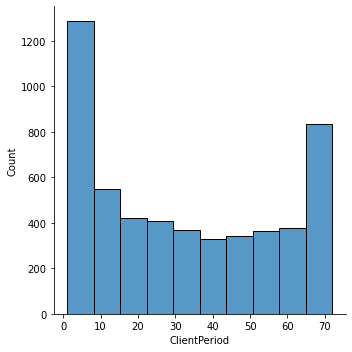

In [8]:
import seaborn as sns
sns_plot = sns.displot(data['ClientPeriod'], bins = 10)

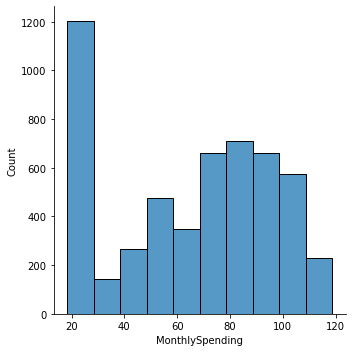

In [9]:
sns_plot = sns.displot(data['MonthlySpending'], bins = 10)

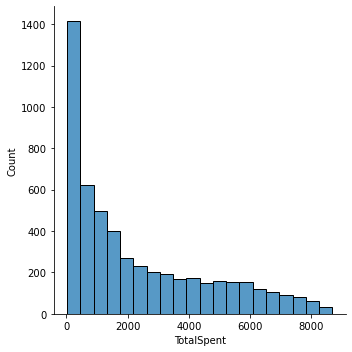

In [10]:
sns_plot = sns.displot(data['TotalSpent'], bins = 20)

In [11]:
categ_data = data.drop(columns = ['ClientPeriod', 'MonthlySpending', 'TotalSpent'])

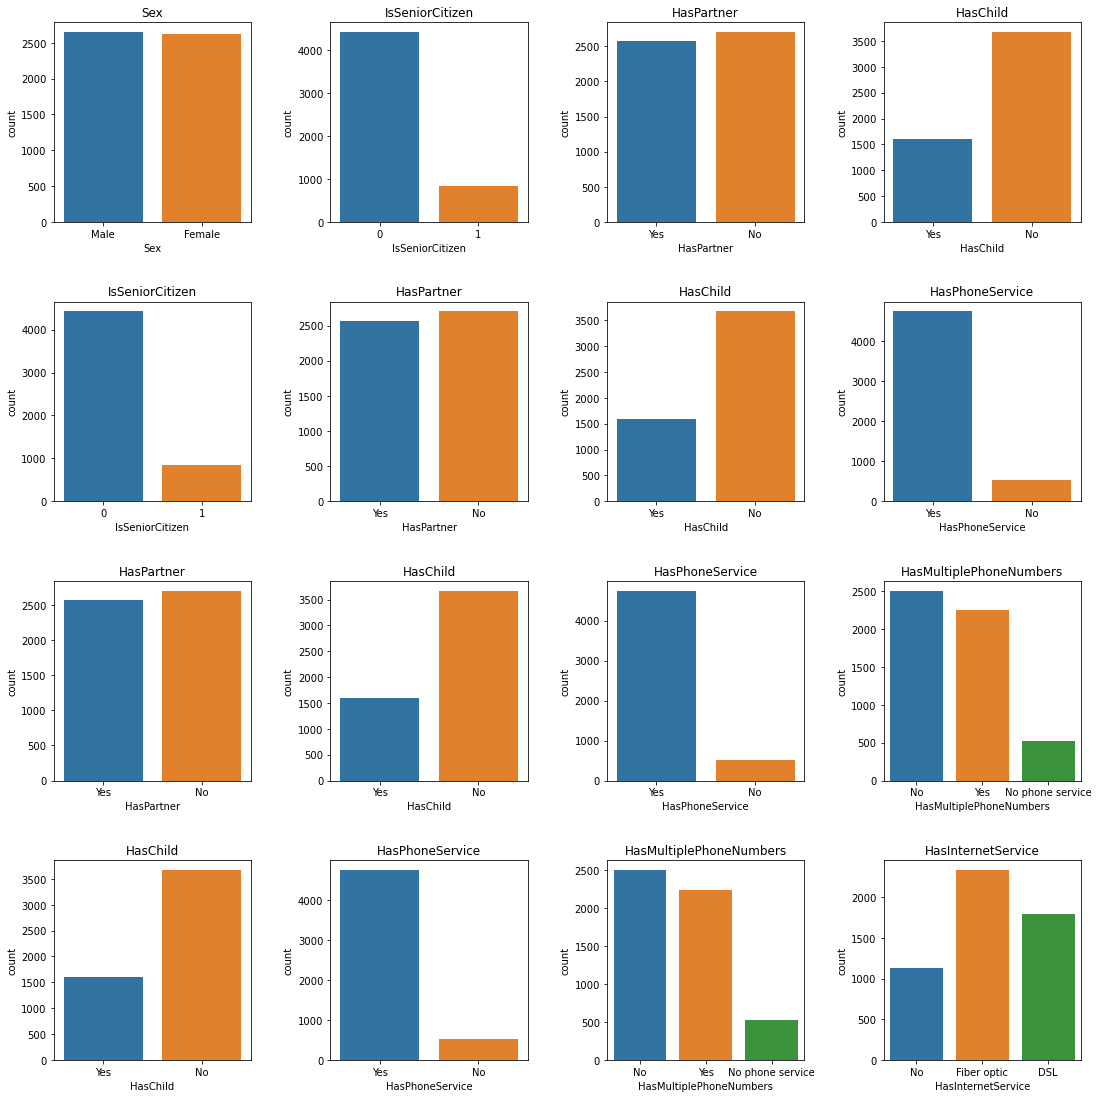

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))
fig.tight_layout()
for i in range(len(axes)):
    for j in range(len(axes[i])):
        sns.countplot(ax = axes[i][j],x=data[cat_cols[i+j]], data = data)
        axes[i][j].set_title(cat_cols[i+j])
plt.subplots_adjust( 
                    wspace=0.4, 
                    hspace=0.4)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [14]:
num_data = data
for col in cat_cols:
    num_data = num_data.drop(columns = col)
num_data = num_data.drop(columns = ['Churn'])
norm_data_ar = num_data
norm_data_ar = preprocessing.normalize(norm_data_ar)
norm_data = pd.DataFrame(norm_data_ar, columns = num_cols)
norm_data.head()

,ClientPeriod,MonthlySpending,TotalSpent
0,0.053502,0.018969,0.998388
1,0.038425,0.013796,0.999166
2,0.009316,0.707076,0.707076
3,0.012444,0.030839,0.999447
4,0.008876,0.017050,0.999815


In [15]:
cat_data = data
for col in num_cols:
    cat_data = cat_data.drop(columns = col)
cat_data = cat_data.drop(columns = ['Churn'])
ohe_data = pd.get_dummies(cat_data)
ohe_data.head()

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [16]:
ohe_data.insert(loc = 0, column = 'Churn', value = data['Churn'])
ohe_data.insert(loc = 1, column = 'ClientPeriod', value = norm_data['ClientPeriod'])
ohe_data.insert(loc = 2, column = 'MonthlySpending', value = norm_data['MonthlySpending'])
ohe_data.insert(loc = 3, column = 'TotalSpent', value = norm_data['TotalSpent'])
ohe_data.head()

,Churn,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.053502,0.018969,0.998388,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,0,0.038425,0.013796,0.999166,0,0,1,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,1,0.009316,0.707076,0.707076,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,0,0.012444,0.030839,0.999447,1,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,0,0.008876,0.017050,0.999815,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [17]:
ohe_data = ohe_data.dropna()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
features = ohe_data.drop(columns = ['Churn'])
labels = ohe_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state = 42, stratify = labels)
log_reg = LogisticRegressionCV(cv=3, n_jobs = -1, max_iter = 200, refit = True, scoring='roc_auc')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(roc_auc_score(y_test,y_pred))


0.7066309272492486


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
features = ohe_data.drop(columns = ['Churn'])
labels = ohe_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state = 42, stratify = labels)
gbm = GradientBoostingClassifier(n_estimators = 5000, learning_rate = 0.05, max_depth = 3, subsample = 0.5,
                                validation_fraction = 0.1, n_iter_no_change = 25, max_features = 'log2', verbose = 1)
gbm.fit(X_train, y_train)
y_pred2 = gbm.predict(X_test)
print(roc_auc_score(y_test,y_pred2))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.1308           0.0152           10.00s
         2           1.0960           0.0156           12.50s
         3           1.1009           0.0123           10.00s
         4           1.0970           0.0125            9.99s
         5           1.0610           0.0136            9.99s
         6           1.0681           0.0143            9.16s
         7           1.0995           0.0078            9.28s
         8           1.0374           0.0080            9.36s
         9           1.0592           0.0106            9.43s
        10           1.0140           0.0112            9.48s
        20           0.9659           0.0031            8.47s
        30           0.9372           0.0021            8.78s
        40           0.9022           0.0020            8.43s
        50           0.8743           0.0009            8.42s
        60           0.8689           0.0007            8.32s
       

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [25]:
features = ohe_data.drop(columns = ['Churn'])
labels = ohe_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state = 42, stratify = labels)
best_model = GradientBoostingClassifier(n_estimators = 5000, learning_rate = 0.05, max_depth = 3, subsample = 0.5,
                                validation_fraction = 0.1, n_iter_no_change = 25, max_features = 'log2', verbose = 1)
gbm.fit(X_train, y_train)
y_pred2 = gbm.predict(X_test)
print(roc_auc_score(y_test,y_pred2))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.1376           0.0102           15.00s
         2           1.1118           0.0107           12.50s
         3           1.1171           0.0170           11.66s
         4           1.0763           0.0144           11.24s
         5           1.0923           0.0103           10.99s
         6           1.0812           0.0131           10.82s
         7           1.0593           0.0119           10.70s
         8           1.0443           0.0097           10.61s
         9           1.0616           0.0087           10.54s
        10           1.0447           0.0074           10.48s
        20           0.9987           0.0043            8.97s
        30           0.9364           0.0036            8.62s
        40           0.8781           0.0027            8.43s
        50           0.9101           0.0008            8.22s
        60           0.8838           0.0013            8.15s
       

Дополнительные баллы за точность на vaild или кросс-валидации:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов